The following notebook's purpose is to demonstrate how KMeans works and how it can be used for different type of segmentation. 
We're going to use the dataset offered by [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Daily+and+Sports+Activities). First we'll expore the dataset and its structure using basic ExploratoryDataAnalysis libraries and then we'll preprocess the data for the machine learning process.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
import os
path="C:\\Users\\Orr\\Documents\\DataScience_2020\\Neoland\\GITHUB_projects\\class\\2.Clustering\\KMEANS\\data"
from tqdm import tqdm
#run after a first check
import warnings
warnings.filterwarnings("ignore")

Folder structure:

* Folders a01, a02, ..., a19 contain data recorded from the 19 activities. (a01 = activity1)
* For each activity, the subfolders p1, p2, ..., p8 contain data from each of the 8 subjects (p1=person1).
* In each subfolder, there are 60 text files s01, s02, ..., s60, one for each segment.(s01=segment1)


File structure:

* 19 activities (a) (in the order given above);
* 8 subjects (p);
* 60 segments (s);
* 5 units on torso (T), right arm (RA), left arm (LA), right leg (RL), left leg (LL);
* 9 sensors on each unit (x,y,z accelerometers, x,y,z gyroscopes, x,y,z magnetometers).


<INS>Sensor units are calibrated to acquire data at 25 Hz sampling frequency. The 5-min signals are divided into 5-sec segments so that 480(=60x8) signal segments are obtained for each activity<INS>.

In [2]:
df = pd.read_csv(path+"/a01/p1/s01.txt", names = list(range(45)))
df.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,8.1305,1.0349,5.4217,-0.009461,0.001915,-0.003424,-0.78712,-0.069654,0.15730,0.70097,...,-0.036453,-2.8071,-9.0812,2.6220,-0.000232,-0.012092,-0.004457,0.74017,0.30053,-0.057730
1,8.1305,1.0202,5.3843,-0.009368,0.023485,0.001953,-0.78717,-0.068275,0.15890,0.71829,...,-0.034005,-2.8146,-9.0737,2.6218,-0.014784,-0.016477,0.002789,0.73937,0.30183,-0.057514
2,8.1604,1.0201,5.3622,0.015046,0.014330,0.000204,-0.78664,-0.068277,0.15879,0.69849,...,-0.036489,-2.8221,-9.0886,2.6366,-0.012770,0.005717,-0.007918,0.73955,0.30052,-0.057219
3,8.1603,1.0052,5.3770,0.006892,0.018045,0.005649,-0.78529,-0.069849,0.15912,0.72799,...,-0.036151,-2.8071,-9.0811,2.6070,-0.005725,0.009620,0.006555,0.74029,0.30184,-0.057750
4,8.1605,1.0275,5.3473,0.008811,0.030433,-0.005346,-0.78742,-0.068796,0.15916,0.71572,...,-0.033807,-2.8146,-9.0737,2.6218,-0.003929,-0.008371,0.002816,0.73845,0.30090,-0.057527


___
In each text file, there are 5 units x 9 sensors = 45 columns and 5 sec x 25 Hz = 125 rows:

* Each column contains the 125 samples of data acquired from one of the sensors of one of the units over a period of 5 sec (column1= s01/a01 per 5 seconds);
* Each row contains data acquired from all of the 45 sensor axes at a particular sampling instant separated by commas (row1= instant of every movement).

Therefore:

* UNIT1 = TORSO (columns 1 to 9),
* UNIT2 = RIGHTARM (columns 10  to 18),
* UNIT3 = LEFTARM (columns 19  to 27),
* UNIT4 = RIGHTLEG (columns 28  to 36),
* UNIT5 = LEFTLEG (columns 37  to 45).

In [3]:
os.getcwd()
os.chdir("C:\\Users\\Orr\\Documents\\DataScience_2020\\Neoland\\GITHUB_projects\\class\\2.Clustering\\KMEANS\\data")
os.chdir(path+"\\a01\\p1\\")
os.listdir()
#first segment sequence for torso
pd.read_csv("s01.txt", names=list(range(45))).iloc[:, :9]
#second segment sequence for torso
pd.read_csv("s02.txt", names=list(range(45))).iloc[:, :9]

,0,1,2,3,4,5,6,7,8
0,7.9665,1.1684,5.6755,-0.005730,0.026995,-0.009029,-0.79062,-0.071635,0.13429
1,7.9516,1.1391,5.6155,0.021366,0.017938,0.000162,-0.79185,-0.070445,0.13370
2,7.9889,1.1462,5.6307,0.003299,0.023385,-0.005354,-0.79230,-0.068743,0.13300
3,7.9367,1.1246,5.5780,0.005106,0.029771,0.006469,-0.79188,-0.071335,0.13317
4,7.9365,1.1169,5.6451,-0.000204,0.053082,0.002716,-0.79185,-0.071091,0.13370
...,...,...,...,...,...,...,...,...,...
120,7.9290,1.1535,5.6984,0.003203,0.010940,-0.004453,-0.79402,-0.070616,0.12868
121,7.9067,1.1465,5.6609,-0.009330,0.037889,-0.005502,-0.79379,-0.070210,0.12788
122,7.9364,1.1386,5.7058,0.005154,0.032336,-0.012750,-0.79358,-0.069797,0.12681
123,7.9067,1.1685,5.7058,0.009645,0.030600,-0.005442,-0.79380,-0.071496,0.12762


In [4]:
a01p1 = pd.DataFrame(columns=range(1125))

for i in ["01","02","03","04","05","06","07","08","09"]+list(range(10,61)):
    df = pd.read_csv(path+"/a01/p1/s{}.txt".format(str(i)), names = list(range(45)))
    df = df.iloc[:, :9]
    
    p = []
    for i in range(len(df)):
        p.extend(df.iloc[i].values)
    #125 rows for each dataframe multiplied for 9 columns
    df5 = pd.DataFrame([p], columns = range(1125))
    a01p1= pd.concat([a01p1, df5])

After completing the iteration we end up with a new DataFrame where the first row contains in 1125 columns (125 x 9) the first segment, and so on.

In [5]:
print(a01p1.shape)
a01p1.head()

(60, 1125)


,0,1,2,3,4,5,6,7,8,9,...,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124
0,8.1305,1.0349,5.4217,-0.009461,0.001915,-0.003424,-0.78712,-0.069654,0.15730,8.1305,...,0.13478,7.9812,1.0945,5.6005,-0.005819,0.016371,0.002868,-0.79209,-0.070456,0.13423
0,7.9665,1.1684,5.6755,-0.005730,0.026995,-0.009029,-0.79062,-0.071635,0.13429,7.9516,...,0.12762,7.8991,1.1389,5.7204,0.003239,0.021752,0.000058,-0.79384,-0.070314,0.12694
0,7.8917,1.1390,5.6980,0.014180,0.028722,-0.009079,-0.79531,-0.069460,0.12447,7.9065,...,0.13108,7.9588,1.1239,5.6168,0.006900,0.028915,-0.000911,-0.79375,-0.071949,0.13380
0,7.9366,1.1536,5.6318,0.003242,0.029965,0.009111,-0.79292,-0.070358,0.13194,7.9665,...,0.12063,7.8090,1.2047,6.0569,-0.003188,0.003819,-0.016342,-0.79537,-0.072348,0.11873
0,7.8913,1.1972,5.9082,-0.044333,-0.067467,-0.004235,-0.79592,-0.073174,0.12086,7.8696,...,0.14448,8.0486,1.1383,5.4544,-0.009570,-0.010470,-0.010857,-0.79026,-0.071108,0.14722


Up to this moment we have organized the first 60 segments of the first person's torso movement. The same iteration can be used to organize the second movement, so in order to save time and lines of code we can create a function to quickly solve the issue.

In [6]:
def get_movement(activity_path):
    """Return a dataframe with all the segments of the given activity for the torso"""
    result = pd.DataFrame(columns = range(1125))
    for i in ["01", "02", "03", "04", "05", "06", "07", "08", "09"] + list(range(10,61)):
        df = pd.read_csv(path+ activity_path + "s{}.txt".format(str(i)), names =range(45))
        df=df.iloc[:, :9]
        p = []
        for i in range(len(df)):
            p.extend(df.iloc[i].values)
        df1= pd.DataFrame([p], columns = range(1125))
        result = pd.concat([result, df1])
    return result   

In [7]:
a01p1 = get_movement("\\a01\\p1\\")
a01p1.shape

(60, 1125)

At this point we're able to quickly organize in one single DataFrame all the segments. Given that every activity is divided in 60 segments, we'll have 60 segments x 19 activities. The final DataFrame for all the data will hence have 1140 rows (60 * 19) per 1125 columns (125 * 9).

Ok, let's create an iteration to load every segment of every activity. The process might take a while, in order to keep track of it we'll use the tqdm library, which by following a simple process display a progress bar.

We can now add a new iteration for every person tested (9) to reach a complete DataFrame for the first acitivity, counting a total of 9120 rows and 1125 columns.

In [8]:
moves = []

for person in tqdm(range(1,9), position = 0, leave = True): 
    for i in ["01", "02", "03", "04", "05", "06", "07", "08", "09"] + list(range(10,20)):
        moves.extend(get_movement("\\a{}\\p{}\\".format(i, person)).values)
        print("activity {} completed".format(i), end = "; ")
    print("person {} completed".format(person))

print("DataFrame completed.")
print("loading...")

  0%|          | 0/8 [00:00<?, ?it/s]

activity 01 completed; activity 02 completed; activity 03 completed; activity 04 completed; activity 05 completed; activity 06 completed; activity 07 completed; activity 08 completed; activity 09 completed; activity 10 completed; activity 11 completed; activity 12 completed; activity 13 completed; activity 14 completed; activity 15 completed; activity 16 completed; activity 17 completed; activity 18 completed; 

 12%|█▎        | 1/8 [02:12<15:29, 132.78s/it]

activity 19 completed; person 1 completed
activity 01 completed; activity 02 completed; activity 03 completed; activity 04 completed; activity 05 completed; activity 06 completed; activity 07 completed; activity 08 completed; activity 09 completed; activity 10 completed; activity 11 completed; activity 12 completed; activity 13 completed; activity 14 completed; activity 15 completed; activity 16 completed; activity 17 completed; activity 18 completed; 

 25%|██▌       | 2/8 [04:06<12:41, 127.00s/it]

activity 19 completed; person 2 completed
activity 01 completed; activity 02 completed; activity 03 completed; activity 04 completed; activity 05 completed; activity 06 completed; activity 07 completed; activity 08 completed; activity 09 completed; activity 10 completed; activity 11 completed; activity 12 completed; activity 13 completed; activity 14 completed; activity 15 completed; activity 16 completed; activity 17 completed; activity 18 completed; 

 38%|███▊      | 3/8 [05:45<09:53, 118.71s/it]

activity 19 completed; person 3 completed
activity 01 completed; activity 02 completed; activity 03 completed; activity 04 completed; activity 05 completed; activity 06 completed; activity 07 completed; activity 08 completed; activity 09 completed; activity 10 completed; activity 11 completed; activity 12 completed; activity 13 completed; activity 14 completed; activity 15 completed; activity 16 completed; activity 17 completed; activity 18 completed; 

 50%|█████     | 4/8 [07:25<07:32, 113.18s/it]

activity 19 completed; person 4 completed
activity 01 completed; activity 02 completed; activity 03 completed; activity 04 completed; activity 05 completed; activity 06 completed; activity 07 completed; activity 08 completed; activity 09 completed; activity 10 completed; activity 11 completed; activity 12 completed; activity 13 completed; activity 14 completed; activity 15 completed; activity 16 completed; activity 17 completed; activity 18 completed; 

 62%|██████▎   | 5/8 [09:06<05:28, 109.42s/it]

activity 19 completed; person 5 completed
activity 01 completed; activity 02 completed; activity 03 completed; activity 04 completed; activity 05 completed; activity 06 completed; activity 07 completed; activity 08 completed; activity 09 completed; activity 10 completed; activity 11 completed; activity 12 completed; activity 13 completed; activity 14 completed; activity 15 completed; activity 16 completed; activity 17 completed; activity 18 completed; 

 75%|███████▌  | 6/8 [10:46<03:32, 106.50s/it]

activity 19 completed; person 6 completed
activity 01 completed; activity 02 completed; activity 03 completed; activity 04 completed; activity 05 completed; activity 06 completed; activity 07 completed; activity 08 completed; activity 09 completed; activity 10 completed; activity 11 completed; activity 12 completed; activity 13 completed; activity 14 completed; activity 15 completed; activity 16 completed; activity 17 completed; activity 18 completed; 

 88%|████████▊ | 7/8 [12:25<01:44, 104.27s/it]

activity 19 completed; person 7 completed
activity 01 completed; activity 02 completed; activity 03 completed; activity 04 completed; activity 05 completed; activity 06 completed; activity 07 completed; activity 08 completed; activity 09 completed; activity 10 completed; activity 11 completed; activity 12 completed; activity 13 completed; activity 14 completed; activity 15 completed; activity 16 completed; activity 17 completed; activity 18 completed; 

100%|██████████| 8/8 [14:05<00:00, 105.71s/it]

activity 19 completed; person 8 completed
DataFrame completed.
loading...


DataFrame structure

1 row is a full segment distributed in 1125 columns as previously seen, hence: 

* Every 60 rows we'll have one activity (60 * 19 = 1140)
* Every 1140 rows we'll have a new person.


In [9]:
fulldf = pd.DataFrame(moves, columns = range(1125))
#save the file as a csv
# fulldf.to_csv("C:/Users/Orr/Documents/DataScience_2020/Neoland/GITHUB_projects/project/2.Clustering/data/final_df.csv")
print(fulldf.shape)

(9120, 1125)


In [10]:
p1 = fulldf.iloc[:1140, :]
p1.head()
#6 activities
p2 = fulldf.iloc[1140:1500, :]

___
Now we can apply KMeans to our algorithm trying to identify the different activities done by the same person

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [12]:
#Normalize the values to improve KMeans
scaled_df = MinMaxScaler().fit_transform(p2.values)
scaled_df.shape

(360, 1125)

In this case we already know that every person did 19 different activities, hence we could already set the number of clusters to 19 and see how the alogrithm behave. However for a more visual impact, we'll use the elbow method to visualize how many k are suggested.

Let's start with just the first 3 activities of the second person:

In [13]:
labels = []
inertia = []
for k in tqdm(range(1,20)):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(scaled_df)
    labels.append(kmeans.labels_)
    inertia.append(kmeans.inertia_)

100%|██████████| 19/19 [00:05<00:00,  3.69it/s]


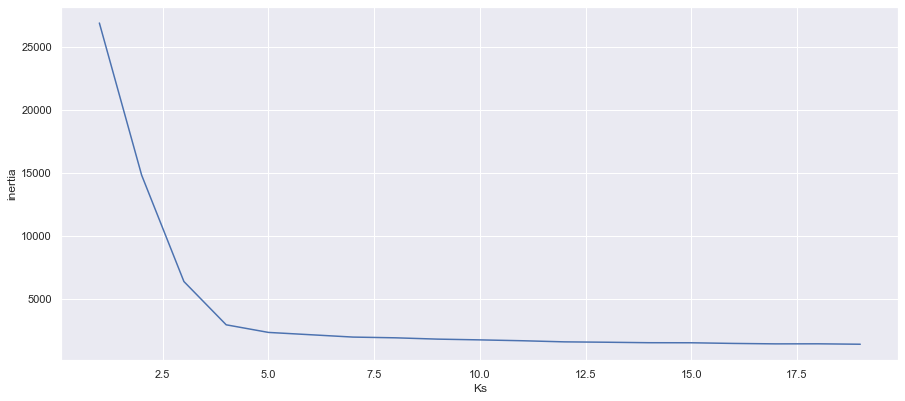

In [14]:
fig, ax = plt.subplots(figsize=(15,6.5))
sns.lineplot(range(1,20), inertia)
ax.set_xlabel("Ks")
ax.set_ylabel("inertia")
plt.show()

Even if we inserted 6 activities the elbow method suggests 4 categories. We could try to confirm it using dendrograms. What we need are:

* distance_matrix from scipy.spatial: preprocess the data into a distance matrix;
* hierarchy from scipy.cluster to define the linkage between the values and to create a dendrogram;
* pylab to visualize the image properly.

In [15]:
from scipy.spatial import distance_matrix

dist = distance_matrix(p2,p2)

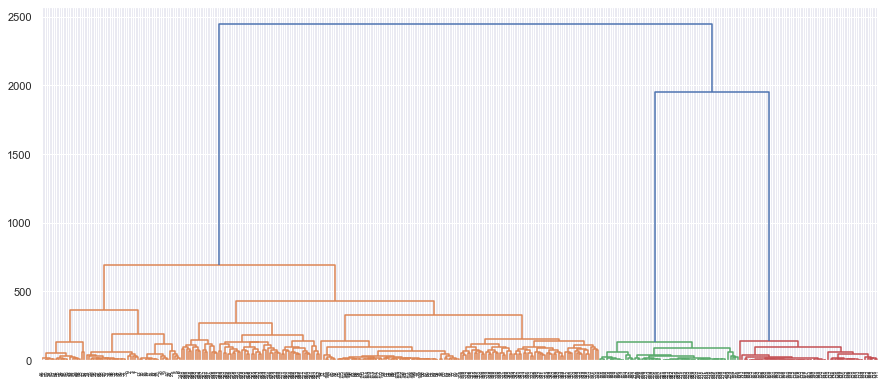

In [16]:
from scipy.cluster import hierarchy
import pylab 

hc = hierarchy.linkage(dist, "complete")

pylab.figure(figsize=(15,6.5))
dendro = hierarchy.dendrogram(hc)
plt.show()

In [17]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(scaled_df)
kmeans.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0,
       0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 3,

In [18]:
from collections import Counter

Counter(kmeans.labels_)

Counter({4: 60, 5: 66, 2: 60, 1: 60, 0: 54, 3: 60})

A similar approach can be used to identify the people who did the same action. 

First we need to take the same activity for the same duration period for every person and organize them in a new DataFrame 480x1125.

In [19]:
a1p1 = fulldf.iloc[:60, :]
a1p2= fulldf.iloc[1140:1200, :]
a1p3= fulldf.iloc[2280:2340, :]
a1p4= fulldf.iloc[3420:3480, :]
a1p5= fulldf.iloc[4560:4620:, :]
a1p6= fulldf.iloc[5700:5760, :]
a1p7= fulldf.iloc[6840:6900, :]
a1p8= fulldf.iloc[7980:8040, :]

a1 = pd.concat([a1p1, a1p2, a1p3, a1p4, a1p5, a1p6, a1p7, a1p8])
a1

,0,1,2,3,4,5,6,7,8,9,...,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124
0,8.1305,1.03490,5.4217,-0.009461,0.001915,-0.003424,-0.78712,-0.069654,0.15730,8.1305,...,0.13478,7.9812,1.09450,5.6005,-0.005819,0.016371,0.002868,-0.79209,-0.070456,0.13423
1,7.9665,1.16840,5.6755,-0.005730,0.026995,-0.009029,-0.79062,-0.071635,0.13429,7.9516,...,0.12762,7.8991,1.13890,5.7204,0.003239,0.021752,0.000058,-0.79384,-0.070314,0.12694
2,7.8917,1.13900,5.6980,0.014180,0.028722,-0.009079,-0.79531,-0.069460,0.12447,7.9065,...,0.13108,7.9588,1.12390,5.6168,0.006900,0.028915,-0.000911,-0.79375,-0.071949,0.13380
3,7.9366,1.15360,5.6318,0.003242,0.029965,0.009111,-0.79292,-0.070358,0.13194,7.9665,...,0.12063,7.8090,1.20470,6.0569,-0.003188,0.003819,-0.016342,-0.79537,-0.072348,0.11873
4,7.8913,1.19720,5.9082,-0.044333,-0.067467,-0.004235,-0.79592,-0.073174,0.12086,7.8696,...,0.14448,8.0486,1.13830,5.4544,-0.009570,-0.010470,-0.010857,-0.79026,-0.071108,0.14722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,7.7184,-0.46463,6.0783,-0.004303,0.028408,0.012864,-0.61483,-0.423010,-0.13669,7.7334,...,-0.13609,7.7513,-0.40677,5.9935,0.034154,0.021411,-0.016038,-0.60436,-0.434600,-0.14984
8036,7.7185,-0.44973,6.0560,-0.002494,0.012908,-0.006219,-0.61413,-0.422250,-0.13627,7.7334,...,-0.14728,7.7420,-0.46758,6.0435,0.019033,0.019948,0.010828,-0.62519,-0.425140,-0.12629
8037,7.7484,-0.42033,6.0565,0.000369,0.047946,0.000934,-0.61282,-0.421020,-0.13434,7.7333,...,-0.13218,7.7223,-0.47145,6.0620,0.002615,0.014236,0.005159,-0.62209,-0.410730,-0.12578
8038,7.7336,-0.40531,6.0341,0.019278,0.029950,0.006507,-0.61315,-0.423720,-0.13042,7.7486,...,-0.13486,7.7310,-0.41831,6.0811,-0.010447,0.010243,0.005524,-0.63247,-0.427080,-0.13578


now we scale the values using MinMaxScaler or the one you consider ideal for the problem and then use the new array with KMeans:

In [20]:
scaler = MinMaxScaler()
scaled_a1 = scaler.fit_transform(a1)
scaled_a1

array([[0.43675305, 0.84914144, 0.82419432, ..., 0.34079812, 0.60484966,
        0.85387284],
       [0.38517424, 0.88424623, 0.8500862 , ..., 0.33905789, 0.60505784,
        0.84696315],
       [0.36164926, 0.87651529, 0.85238158, ..., 0.33914738, 0.60266086,
        0.85346527],
       ...,
       [0.3165807 , 0.46647821, 0.88895463, ..., 0.50984974, 0.10599463,
        0.60742721],
       [0.31192603, 0.47042783, 0.88666946, ..., 0.49952765, 0.08202489,
        0.59794889],
       [0.31183168, 0.45672513, 0.88971976, ..., 0.52406997, 0.11162422,
        0.59834698]])

Once again the elbow method will give us a better idea of the number of groups identified:

In [21]:
inertia = []
labels = []
for k in range(1,20):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(scaled_a1)
    inertia.append(kmeans.inertia_)
    labels.append(kmeans.labels_)    

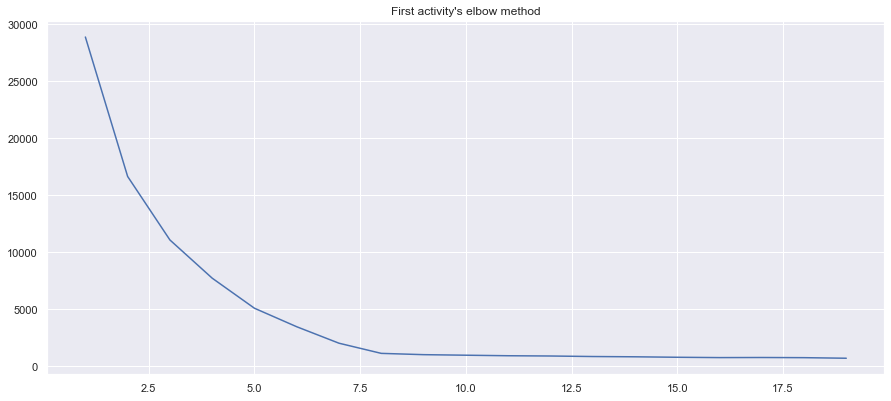

In [22]:
fig, ax = plt.subplots(figsize = (15, 6.5))
ax.set_title("First activity's elbow method")
sns.lineplot(range(1,20), inertia)
plt.show()

The KMeans correctly identified 8 different clusters, let's apply and see how it behaves:

In [23]:
model = KMeans(n_clusters = 8)
model.fit(scaled_a1)
labels = model.labels_
Counter(labels)

Counter({0: 60, 6: 60, 3: 60, 1: 60, 2: 60, 4: 60, 7: 60, 5: 60})

The algorithm worked perfectly, recognizing 8 people doing the same activity for the same period of time. 
___